In [2]:
import pandas as pd

sr = pd.read_csv('files/SuicideRates.csv')
cc = pd.read_csv('files/GlobalLandTemperaturesByCountry.csv')

In [3]:
sr.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
sr = sr.copy()[sr['country'] == "Poland"]
sr.set_index('year', inplace=True)

In [16]:
sr.head()

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,,
1990,Poland,male,35-54 years,1670,4766000,35.04,Poland1990,0.713,"65,977,749,037",1876,Silent
1990,Poland,male,55-74 years,890,2665000,33.40,Poland1990,0.713,"65,977,749,037",1876,G.I. Generation
1990,Poland,male,25-34 years,917,3012400,30.44,Poland1990,0.713,"65,977,749,037",1876,Boomers
1990,Poland,male,75+ years,141,517200,27.26,Poland1990,0.713,"65,977,749,037",1876,G.I. Generation
1990,Poland,male,15-24 years,440,2720300,16.17,Poland1990,0.713,"65,977,749,037",1876,Generation X


In [17]:
sr = sr.copy()[[ 'sex', 'age', 'suicides/100k pop', 'generation']]

In [18]:
sr.head()

,sex,age,suicides/100k pop,generation
year,,,,
1990,male,35-54 years,35.04,Silent
1990,male,55-74 years,33.40,G.I. Generation
1990,male,25-34 years,30.44,Boomers
1990,male,75+ years,27.26,G.I. Generation
1990,male,15-24 years,16.17,Generation X


In [19]:
cc.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [22]:
cc = cc.copy()[cc["Country"]=='Poland']

In [24]:
cc.dropna().head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
413621,1743-11-01,3.937,2.057,Poland
413626,1744-04-01,8.889,3.110,Poland
413627,1744-05-01,11.952,1.839,Poland
413628,1744-06-01,14.867,1.799,Poland
413629,1744-07-01,17.313,1.803,Poland


In [49]:
(pd.to_datetime(cc['dt'].iloc[0]).year)

1743

In [50]:
def convert_to_year(datetim):
    try:
        return pd.to_datetime(datetim).year
    except:
        return np.NaN

In [52]:
%%time
cc['dt'] = list(map(convert_to_year, cc['dt']))

Wall time: 517 ms


In [53]:
cc.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
413621,1743,3.937,2.057,Poland
413622,1743,NaN,NaN,Poland
413623,1744,NaN,NaN,Poland
413624,1744,NaN,NaN,Poland
413625,1744,NaN,NaN,Poland


In [54]:
cc.dropna(inplace=True)

In [55]:
cc = cc.copy()[cc['dt'] >= 1990]

In [56]:
cc.set_index('dt', inplace=True)

,sex,age,suicides/100k pop,generation
year,,,,
2015,female,75+ years,4.30,Silent
2015,female,15-24 years,2.80,Millenials
2015,female,25-34 years,2.42,Millenials
2015,male,5-14 years,0.61,Generation Z
2015,female,5-14 years,0.38,Generation Z


In [60]:
cc.tail()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
2013,8.173,0.279,Poland
2013,14.957,0.232,Poland
2013,17.811,0.209,Poland
2013,19.584,0.417,Poland
2013,19.148,0.340,Poland


In [65]:
cc.index.names = ['year']

In [77]:
cc.tail()

,AverageTemperature
year,
2009,8.652917
2010,7.621417
2011,8.951667
2012,8.537750
2013,9.257875


In [72]:
cc.drop("Country", axis=1, inplace=True)

In [78]:
cc.to_csv('files/AverageTemperatureInPolandByYear.csv')

In [79]:
sr.head()

,sex,age,suicides/100k pop,generation
year,,,,
1990,male,35-54 years,35.04,Silent
1990,male,55-74 years,33.40,G.I. Generation
1990,male,25-34 years,30.44,Boomers
1990,male,75+ years,27.26,G.I. Generation
1990,male,15-24 years,16.17,Generation X


In [85]:
sr = pd.read_csv('files/SuicideRates.csv')
sr = sr.copy()[sr['country'] == "Poland"]
sr.set_index('year', inplace=True)
sr.head()

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,,
1990,Poland,male,35-54 years,1670,4766000,35.04,Poland1990,0.713,"65,977,749,037",1876,Silent
1990,Poland,male,55-74 years,890,2665000,33.40,Poland1990,0.713,"65,977,749,037",1876,G.I. Generation
1990,Poland,male,25-34 years,917,3012400,30.44,Poland1990,0.713,"65,977,749,037",1876,Boomers
1990,Poland,male,75+ years,141,517200,27.26,Poland1990,0.713,"65,977,749,037",1876,G.I. Generation
1990,Poland,male,15-24 years,440,2720300,16.17,Poland1990,0.713,"65,977,749,037",1876,Generation X


In [81]:
sr['generation'].unique()

array(['Silent', 'G.I. Generation', 'Boomers', 'Generation X',
       'Millenials', 'Generation Z'], dtype=object)

In [86]:
sr = sr.copy()[['sex', 'age', 'suicides_no','population', 'suicides/100k pop']]

In [87]:
sr.head()

,sex,age,suicides_no,population,suicides/100k pop
year,,,,,
1990,male,35-54 years,1670,4766000,35.04
1990,male,55-74 years,890,2665000,33.40
1990,male,25-34 years,917,3012400,30.44
1990,male,75+ years,141,517200,27.26
1990,male,15-24 years,440,2720300,16.17


In [88]:
sr.to_csv('files/SuicidesInPoland1990-2015.csv')

In [89]:
sr = sr.copy()[['suicides_no', 'population']]

In [90]:
sr.head()

,suicides_no,population
year,,
1990,1670,4766000
1990,890,2665000
1990,917,3012400
1990,141,517200
1990,440,2720300


In [91]:
sr.groupby(level=0).sum()

,suicides_no,population
year,,
1990,4970,35164800
1991,5316,35396300
1992,5713,35605400
1993,5624,35792600
1994,5519,35960000
1995,5499,36104900
1996,5446,36243300
1999,5779,36575200
2000,5841,36233344


In [92]:
sr = sr.groupby(level=0).sum()

In [93]:
df = pd.merge(cc, sr, left_index=True, right_index=True)

In [94]:
df.head(10)

,AverageTemperature,suicides_no,population
year,,,
1990,9.231667,4970,35164800
1991,7.944667,5316,35396300
1992,8.813500,5713,35605400
1993,7.831083,5624,35792600
1994,8.921000,5519,35960000
1995,8.262250,5499,36104900
1996,6.768500,5446,36243300
1999,9.035000,5779,36575200
2000,9.622167,5841,36233344


In [95]:
df_safe = df.copy()

In [97]:
df_safe['suicide%'] = df_safe['suicides_no']/df_safe['population']*100

In [98]:
df_safe.head()

,AverageTemperature,suicides_no,population,suicide%
year,,,,
1990,9.231667,4970,35164800,0.014133
1991,7.944667,5316,35396300,0.015019
1992,8.813500,5713,35605400,0.016045
1993,7.831083,5624,35792600,0.015713
1994,8.921000,5519,35960000,0.015348


In [100]:
df = df_safe.copy()[['AverageTemperature', 'suicide%']]

In [101]:
df.to_csv('files/PolandSucidesToAverageTemperature')

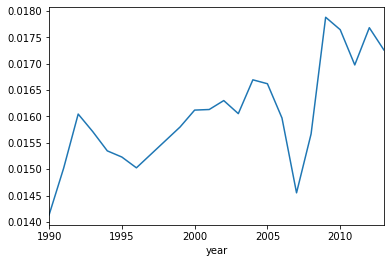

In [110]:
df_safe['suicide%'].plot()

In [106]:
df.sort_index(ascending=True, inplace=True)

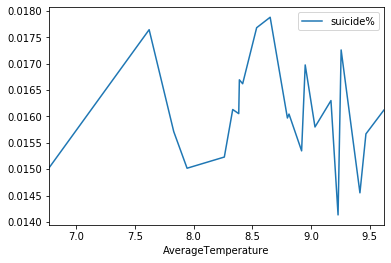

In [107]:
df.plot()

In [108]:
df_safe.head()

,AverageTemperature,suicides_no,population,suicide%
year,,,,
1990,9.231667,4970,35164800,0.014133
1991,7.944667,5316,35396300,0.015019
1992,8.813500,5713,35605400,0.016045
1993,7.831083,5624,35792600,0.015713
1994,8.921000,5519,35960000,0.015348


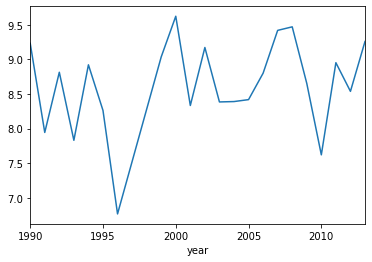

In [111]:
df_safe['AverageTemperature'].plot()

In [113]:
df_safe.head(10)

,AverageTemperature,suicides_no,population,suicide%
year,,,,
1990,9.231667,4970,35164800,0.014133
1991,7.944667,5316,35396300,0.015019
1992,8.813500,5713,35605400,0.016045
1993,7.831083,5624,35792600,0.015713
1994,8.921000,5519,35960000,0.015348
1995,8.262250,5499,36104900,0.015231
1996,6.768500,5446,36243300,0.015026
1999,9.035000,5779,36575200,0.015800
2000,9.622167,5841,36233344,0.016121
